<a href="https://colab.research.google.com/github/lucatraverso/Mapa-de-ruido_Geopandas/blob/main/mapa_de_ruido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mapa de ruido de CABA

Vamos a jugar un poco con geopandas y el mapa de ruido disponible en la pagina del Gobierno de la Ciudad. Que informacion nos puede interesar?
- Distribucion de los limites segun comunas
- Comuna mas ruidosa.
- Comuna mas menos ruidosa
- Calles o avenidas mas ruidosas

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos//datasets/mapa-del-ruido/mapa_de_ruido_diurno.csv

In [ ]:
mapa_ruido = gpd.read_file('mapa_de_ruido_diurno.csv')

In [ ]:
mapa_ruido.columns
mapa_ruido.head(3)


,wkt,limite_inferior_rango_db,limite_superior_rango_db,comuna,leyenda,rango_db,color,periodo,geometry
0,MULTIPOLYGON (((-58.3714231269834 -34.57855223...,30.0,35.0,1,35 dBA o menos,30-35,169 255 115,Diurno,"MULTIPOLYGON (((-58.37142 -34.57855, -58.37150..."
1,MULTIPOLYGON (((-58.3714231269834 -34.57855223...,35.0,40.0,1,35-40 dBA,35-40,76 230 0,Diurno,"MULTIPOLYGON (((-58.37142 -34.57855, -58.37142..."
2,MULTIPOLYGON (((-58.3714231117057 -34.57856621...,40.0,45.0,1,40-45 dBA,40-45,38 115 0,Diurno,"MULTIPOLYGON (((-58.37142 -34.57857, -58.37142..."


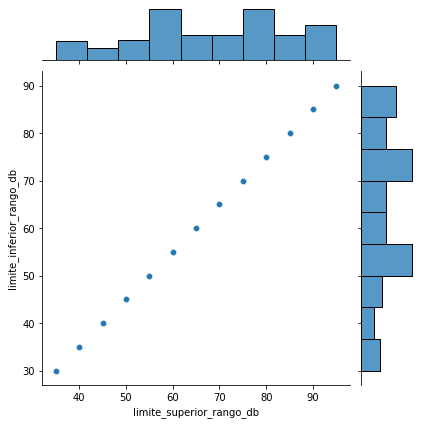

In [ ]:
mapa_ruido[['limite_inferior_rango_db', 'limite_superior_rango_db']] = mapa_ruido[['limite_inferior_rango_db', 'limite_superior_rango_db']].astype(float)

rango = mapa_ruido.limite_superior_rango_db - mapa_ruido.limite_inferior_rango_db
sns.jointplot(data = mapa_ruido, 
              x = 'limite_superior_rango_db', 
              y = 'limite_inferior_rango_db')

Se ve una relacion lineal entre los limites superior e inferior. Dado que la diferencia es constante, vamos a observar solo el limite superior. Ahora vamos a plotear el mapa de ruido de la ciudad utilizando el limite elegido.

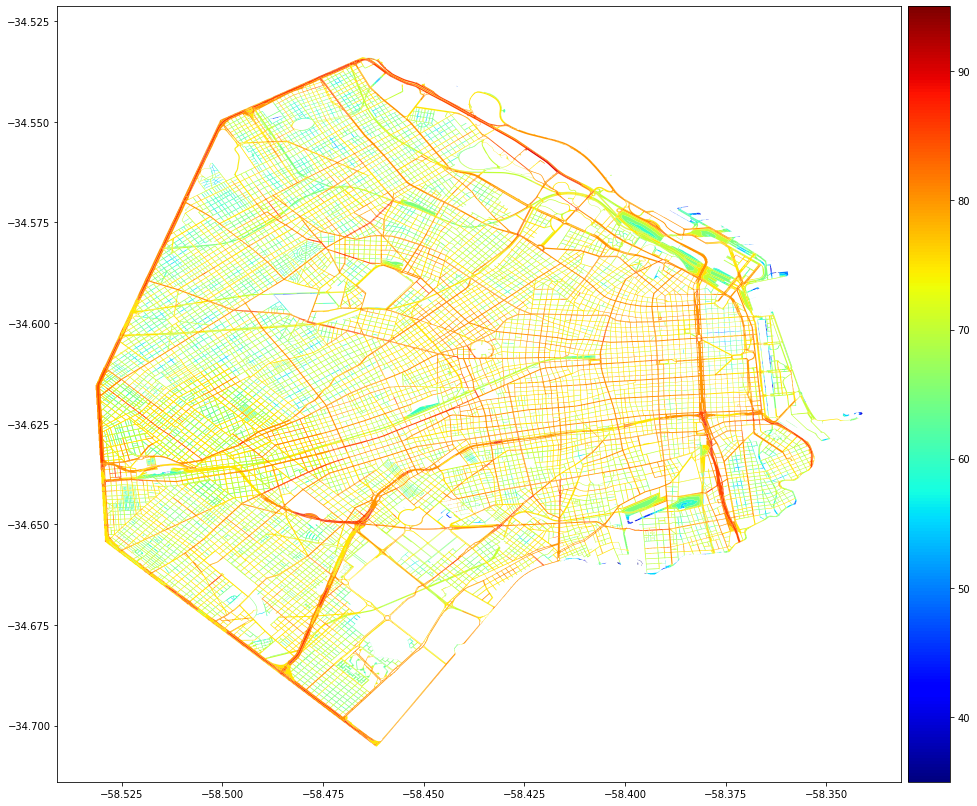

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(16,16))

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

mapa_ruido.plot(column='limite_superior_rango_db', 
                legend=True, 
                cmap='jet', 
                ax=ax, 
                cax=cax)



Veamos la distribución de los limites por comuna.



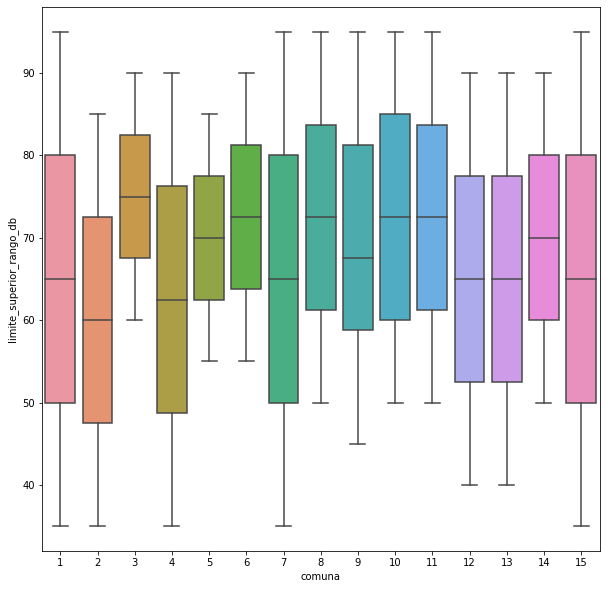

In [ ]:
fig, axis = plt.subplots(figsize=(10,10))

sns.boxplot(x='comuna',
            y='limite_superior_rango_db',
            data=mapa_ruido, 
            ax=axis)


Se ve que la comuna con el percentil 50 mas alto es la 3, mientras que los limites mas bajos estan en las comunas 2 y 4.
Vamos a observar mas de cerca estos barrios.

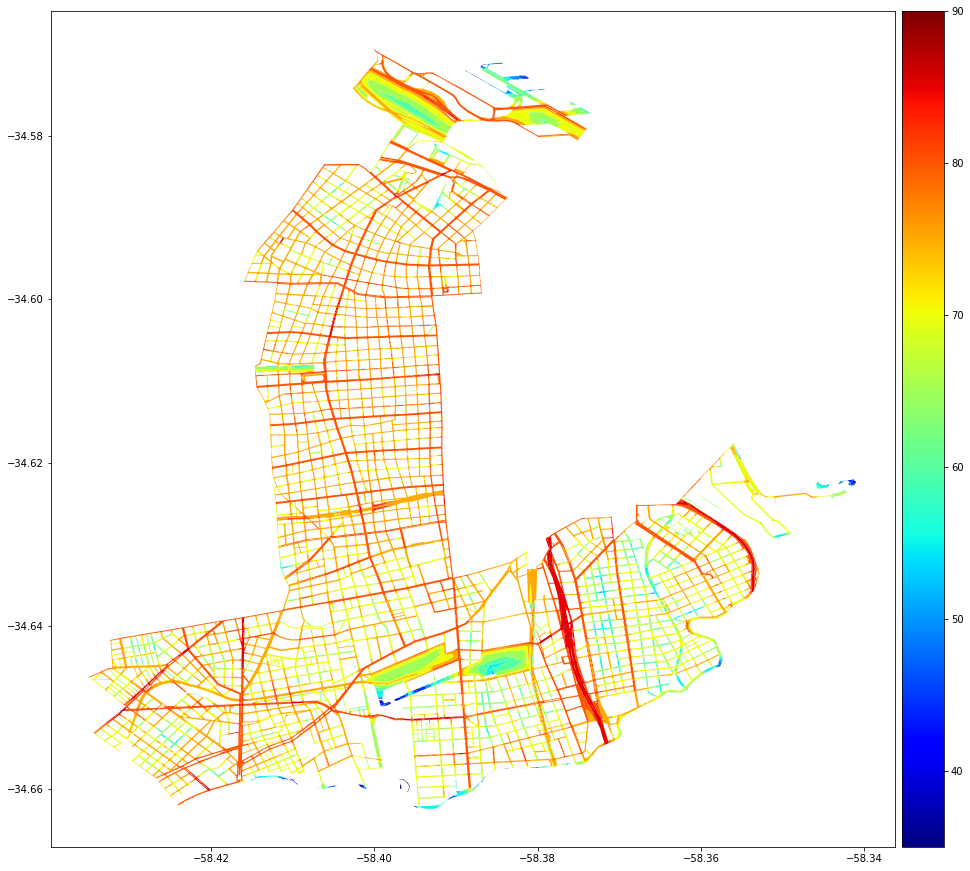

In [ ]:
fix, axis = plt.subplots(figsize=(16,16))

divider = make_axes_locatable(axis)

cax = divider.append_axes("right", size="5%", pad=0.1)

mapa_ruido[mapa_ruido.comuna.isin(['2', '3', '4'])].plot(column='limite_superior_rango_db', 
                                                         cmap='jet',
                                                         legend=True,
                                                         ax=axis, 
                                                         cax=cax)


Según estudios, la exposición a niveles de ruido altos por un tiempo prolongado pueden generar daños permanentes en el sistema auditivo. Los niveles maximos permitidos son:

- 8 hs = 85 dBA
- 4 hs = 88 dBA
- 2 hs = 91 dBA
- 1 hs = 94 dBA

Vamos a observar que calles en CABA poseen un limite inferior de 80 dBA o mayor.

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:642: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


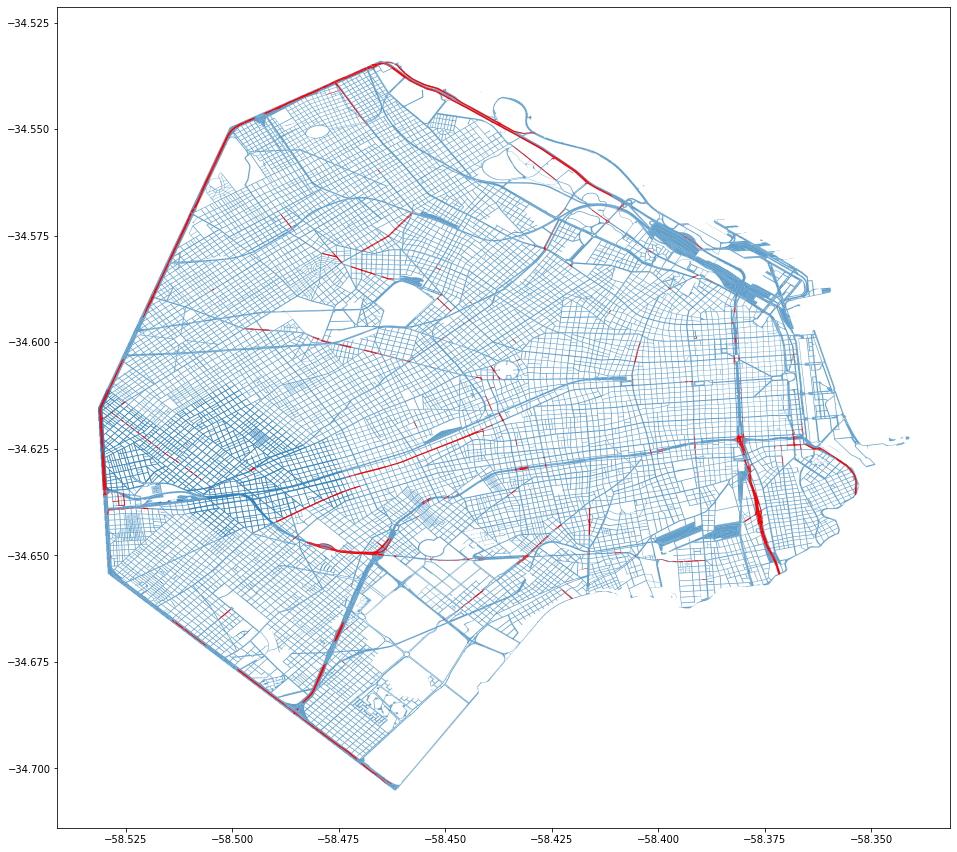

In [51]:
mask = mapa_ruido['limite_inferior_rango_db'] >= 80.0
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
mapa_ruido.plot(ax=ax, 
                alpha = 0.7)

mapa_ruido[mask].plot(column='limite_inferior_rango_db', 
                      ax=ax,
                      color='r')

Segun muestran los datos las regiones donde el piso de ruido es alto son pocas.
La comuna mas ruidosa esta, paradojicamente, pegada a las que presentan valores medios mas bajos.